In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Dependencies for the "Get the City Weather Data" part
from citipy import citipy
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [3]:
# Pack the latitudes and longitudes as pairs
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates[:10]

[(-80.98131860948062, 7.029092987929573),
 (-26.66304516524162, 117.0595217848936),
 (-9.813433033475818, -14.2101954309924),
 (-75.63818582120362, 85.74465155436633),
 (-0.997981479744098, 50.793333024676656),
 (-28.94383217199759, -153.66933124124736),
 (30.502356792658503, 165.6115585622765),
 (78.17460997115012, -18.433343202970065),
 (-19.100878969941974, -39.81481788734362),
 (53.33381322781369, 114.51277195483976)]

## CityPy. Find the nearest city

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

## Set up the API URL

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
base_url =  url + "appid=" + weather_api_key + "&units=metric"

## Get the City Weather Data

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = base_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | sao mateus
Processing Record 10 of Set 1 | verkh-usugli
Processing Record 11 of Set 1 | ca mau
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | neiafu
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | myrtle beach
Processing Record 22 of Set 1 | linxia
Process

Processing Record 39 of Set 4 | tarabha
Processing Record 40 of Set 4 | huayang
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | kerki
City not found. Skipping...
Processing Record 43 of Set 4 | smolino
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | edson
Processing Record 46 of Set 4 | ixtapa
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | evensk
Processing Record 2 of Set 5 | honiara
Processing Record 3 of Set 5 | batagay-alyta
Processing Record 4 of Set 5 | nisporeni
Processing Record 5 of Set 5 | den helder
Processing Record 6 of Set 5 | poplar bluff
Processing Record 7 of Set 5 | tuktoyaktuk
Processing Record 8 of Set 5 | loralai
Processing Record 9 of Set 5 | henties bay
Processing Record 10 of Set 5 | lahij
Processing Record 11 of Set 5 | milingim

City not found. Skipping...
Processing Record 28 of Set 8 | sola
Processing Record 29 of Set 8 | warrnambool
Processing Record 30 of Set 8 | jamay
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | bababe
City not found. Skipping...
Processing Record 33 of Set 8 | delta del tigre
Processing Record 34 of Set 8 | ochakiv
Processing Record 35 of Set 8 | chaparral
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | zyryanka
Processing Record 39 of Set 8 | goundam
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | radomsko
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | sidi ali
Processing Record 44 of Set 8 | hihifo
City not found. Skipping...
Processing Record 45 of Set 8 | quang ngai
Processing Record 46 of Set 8 | pagudpud
Processing Record 47 of Set 8 | bilma
Processing Record 48 of Set 8 | shingu
Processing Record 49 of Set 8 | sarangani
Processing Recor

Processing Record 16 of Set 12 | coracora
Processing Record 17 of Set 12 | mrirt
City not found. Skipping...
Processing Record 18 of Set 12 | abu samrah
Processing Record 19 of Set 12 | la ronge
Processing Record 20 of Set 12 | irituia
Processing Record 21 of Set 12 | zhigansk
Processing Record 22 of Set 12 | guanica
Processing Record 23 of Set 12 | nagar karnul
Processing Record 24 of Set 12 | bahia honda
Processing Record 25 of Set 12 | tayga
Processing Record 26 of Set 12 | teguise
Processing Record 27 of Set 12 | muroto
Processing Record 28 of Set 12 | sobolevo
Processing Record 29 of Set 12 | deming
Processing Record 30 of Set 12 | wronki
Processing Record 31 of Set 12 | nurota
Processing Record 32 of Set 12 | ocosingo
Processing Record 33 of Set 12 | salgado de sao felix
Processing Record 34 of Set 12 | wau
Processing Record 35 of Set 12 | jawhar
Processing Record 36 of Set 12 | liminangcong
City not found. Skipping...
Processing Record 37 of Set 12 | saint-pierre
Processing Reco

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,14.39,77,44,1.50,ZA,2021-11-10 04:07:13
1,Geraldton,-28.7667,114.6000,23.23,31,0,7.72,AU,2021-11-10 04:07:14
2,Georgetown,5.4112,100.3354,27.96,85,20,0.45,MY,2021-11-10 04:00:40
3,Busselton,-33.6500,115.3333,18.50,43,0,3.47,AU,2021-11-10 04:07:14
4,Victoria,22.2855,114.1577,24.58,33,33,1.34,HK,2021-11-10 04:00:27
5,Avera,33.1940,-82.5271,15.93,42,90,2.22,US,2021-11-10 04:07:15
6,Severo-Kurilsk,50.6789,156.1250,4.36,81,97,5.96,RU,2021-11-10 04:07:15
7,Sao Mateus,-18.7161,-39.8589,22.45,94,98,0.94,BR,2021-11-10 04:07:16
8,Verkh-Usugli,52.7000,115.1667,0.32,36,1,4.85,RU,2021-11-10 04:07:16
9,Ca Mau,9.1769,105.1500,28.82,77,98,4.98,VN,2021-11-10 04:07:17


Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

In [12]:
city_data_df =  city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-11-10 04:07:13,-34.4187,19.2345,14.39,77,44,1.50
1,Geraldton,AU,2021-11-10 04:07:14,-28.7667,114.6000,23.23,31,0,7.72
2,Georgetown,MY,2021-11-10 04:00:40,5.4112,100.3354,27.96,85,20,0.45
3,Busselton,AU,2021-11-10 04:07:14,-33.6500,115.3333,18.50,43,0,3.47
4,Victoria,HK,2021-11-10 04:00:27,22.2855,114.1577,24.58,33,33,1.34
5,Avera,US,2021-11-10 04:07:15,33.1940,-82.5271,15.93,42,90,2.22
6,Severo-Kurilsk,RU,2021-11-10 04:07:15,50.6789,156.1250,4.36,81,97,5.96
7,Sao Mateus,BR,2021-11-10 04:07:16,-18.7161,-39.8589,22.45,94,98,0.94
8,Verkh-Usugli,RU,2021-11-10 04:07:16,52.7000,115.1667,0.32,36,1,4.85
9,Ca Mau,VN,2021-11-10 04:07:17,9.1769,105.1500,28.82,77,98,4.98


Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Weather Data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Latitude vs. Temperature

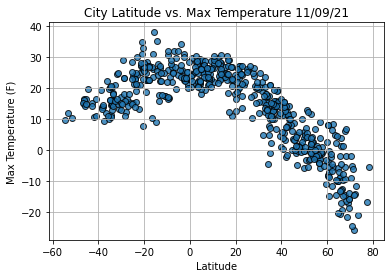

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude vs. Humidity

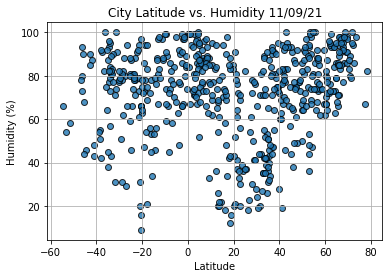

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

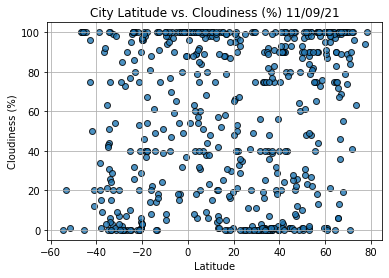

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### Latitude vs. Wind Speed

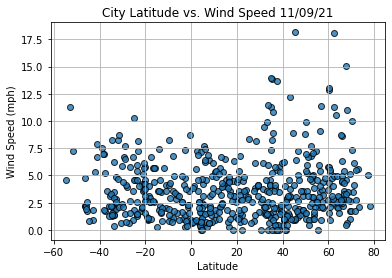

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, xy = text_coordinates, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Linear Regression for each Hemispheres

Split the DataFrame into the Northern and Southern

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Correlation Between Latitude and Maximum Temperature

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.

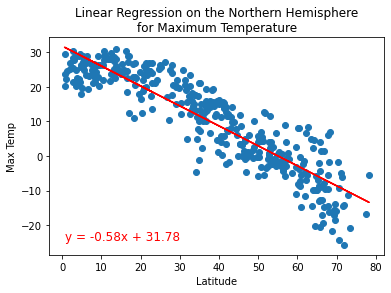

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',
                       (min(x_values),min(y_values)*.95))

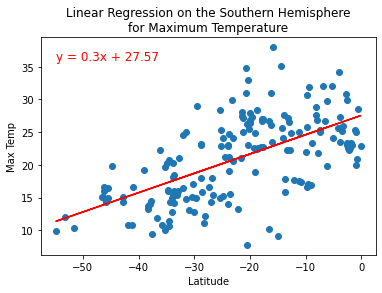

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',
                       (min(x_values),max(y_values)*.95))

### Correlation Between Latitude and Percent Humidity

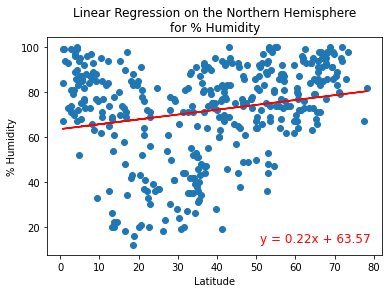

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',
                       (max(x_values)*.65,min(y_values)*1.10))

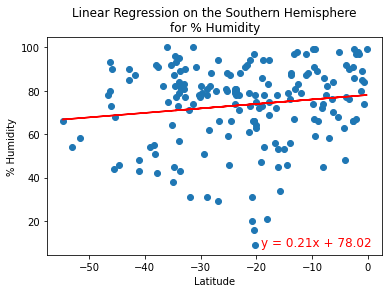

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',
                       (min(x_values)*.35,min(y_values)*.95))

### Correlation Between Latitude and Percent Cloudiness

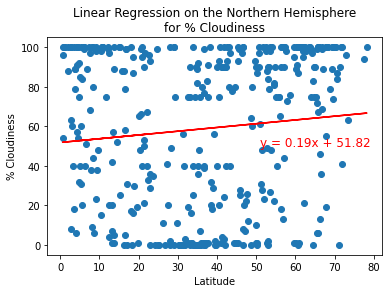

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',
                       (max(x_values)*.65,max(y_values)*.5))

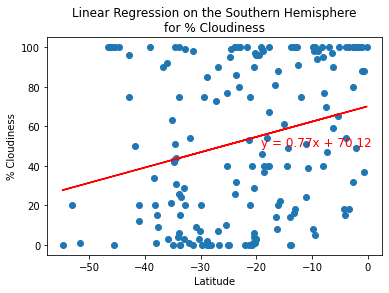

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',
                       (min(x_values)*.35,max(y_values)*.5))

### Correlation Between Latitude and Wind Speed

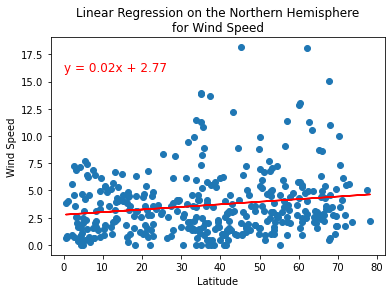

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',
                       (0,16))

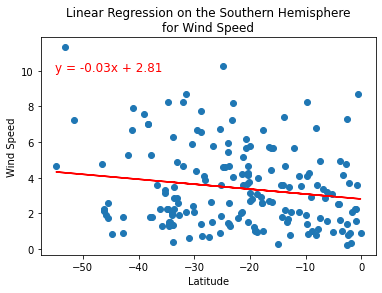

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed',
                       (-55,10))